<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-II/blob/main/COMPARACION_MCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import time

# MEDIA MUESTRAL



# **INTEGRACION MC**

La integración Monte Carlo se emplea principalmente para aproximar integrales multidimensionales
$$
\int ... \int s(x_1,...x_2)dx_1...dx_n
$$
donde puede presentar ventajas respecto a los métodos tradicionales de integración numérica ya que la velocidad de convergencia no depende del número de dimensiones.
INTEGRACION MC clasica

En el caso de que el dominio D sea acotado, la aproximación más simple consiste en considerar una distribución uniforme en D.

Por simplicidad nos centraremos en el caso unidimensional (el orden de convergencia es independiente del número de dimensiones). Supongamos que nos interesa aproximar:

$$
I = \int_{0}^{1} s(x) dx
$$

Si $x_1,..,x_,$ iid U(0,1) entonces

$$
I = E(s(U(0,1))) \approx \frac{1}{n} \sum_{i=1}^{n} s(x_i)
$$
Si el intervalo de integración es generico
$$
I = \int_{a}^{b} s(x) dx = (b-a) \int_{a}^{b} s(x)  \frac{1}{b-a} dx = (b-a)  E(s(U(a,b)))
$$
Por lo tanto

$$
I \approx \frac{b-a}{n} \sum_{i=1}^{n} s(x_i)
$$



In [2]:
start_time = time.time()

In [3]:
def g_media(x):       #Esta función calcula las funciones gi(x) y las guarada en una lista
  gi=np.cos(np.pi*x/2)
  return gi

In [4]:
def exp_media(n,a,b):
  I1 = []
  ui=np.random.uniform(0, 1, n)      #Genera n variables ~ U(0,1)
  xi=a+ui*(b-a)                      #Calcula lista de Xi
  gi=g_media(xi)                           #Calcula lista de g(Xi)
  I=(b-a)/n*np.sum(gi)               #Calcula aproximación
  return I

In [5]:
def histograma(aprox):                                  #Esta función imprime la estimación y el histograma
  plt.hist(aprox, bins=100, color='pink', alpha=0.7)
  plt.axvline(np.mean(aprox),label='Media')
  plt.xlabel('Valor de la integral')
  plt.ylabel('Frecuencia')
  plt.legend()
  print('Estimación (Media): ', np.mean(aprox))
  return

Estimación (Media):  0.6369818137467111


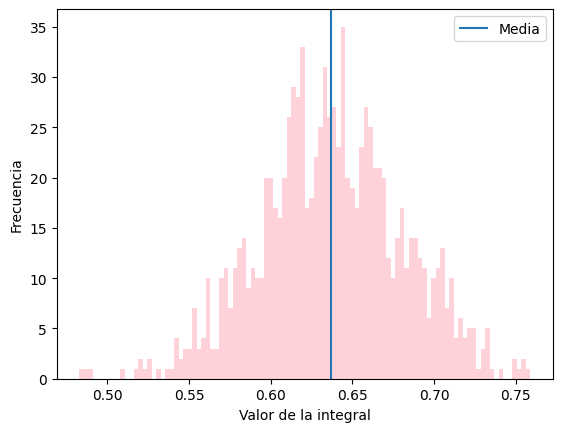

In [6]:
#Parametros
m=1000        #Número de iteraciones
n=50           #Tamaño de la experimentos
a=0             #Límite inferior de la integral
b=1             #Límite superior de la integral
aprox_media=[]
s = []
for i in range(m):
  I = exp_media(n,a,b)
  aprox_media.append(I)
histograma(aprox_media)

In [7]:
end_time = time.time()
T1 = end_time - start_time
print(f"Tiempo de ejecución: {T1} segundos")

Tiempo de ejecución: 15.407499313354492 segundos


In [8]:
mu = np.mean(aprox_media)
print(mu)
sigma_mean = np.var(aprox_media)
print(sigma_mean)

0.6369818137467111
0.0019195576929550901


# ACIERTO Y ERROR

Este método consiste en lo siguiente:
 1. Supongamos que queremos aproximar la integral $$ \int_a^b f(x) \, dx $$ y que sabemos que la función $f(x)$ está acotada por un valor $M$, es decir, $ 0 \leq f(x) \leq M$ en el intervalo $ [a, b] $.

 2. Generamos $N$ puntos aleatorios dentro de un rectángulo de base $ b - a $ y altura $ M $. Es decir, los puntos $ (x_i, y_i) $ son generados aleatoriamente con $ x_i \in [a, b] $ y $ y_i \in [0, M] $.

 3. Contamos cuántos de esos puntos caen debajo de la curva de la función \( f(x) \), es decir, cuántos puntos $(x_i, y_i)$ cumplen con $ y_i \leq f(x_i)$

Para aproximar la integral utilizaremos la media dada de la siguiente forma:

 $$I \approx \frac{\text{Aciertos}}{N}$$


In [9]:
start_time = time.time()

In [10]:
def g(x):       #Esta función calcula las funciones gi(x) y las guarada en una lista
  gi=np.cos(np.pi*x/2)
  return gi

In [11]:
def aceptacion_rechazo(n,ui1,ui2,gi,a,b,c):     #Esta función aplica la condición de Aceptación y rechazo
  aciertos=0
  prob = []
  inside = []
  outside = []
  for i in range(n): #u0,u1
    if c*ui2[i] < gi[i-1]:                #Condición de aceptación
      aciertos+=1
      prob.append(aciertos/(i+1))

  for i in range(n): #Calcula los puntos que caen dentro y fuera de la función
    if ui2[i] <= g(ui1[i]):
     inside.append((ui1[i], ui2[i]))
    else:
     outside.append((ui1[i], ui2[i]))

  I=c*(b-a)*aciertos/n                #Calcula la estimación mediante la media muestral
  return I,inside,outside,prob

In [12]:
def exp(n,a,b,c):                           #Esta función realiza los experimentos
  ui1=np.random.uniform(0, 1, n)            #Genera primer número aleatorio
  ui2=np.random.uniform(0, 1, n)            #Genera segundo número aleatorio
  xi=a+ui1*(b-a)                            #Calcula la lista Xi
  gi=g(xi)                          #Calcula la lista gi
  [I,inside,outside,prob] = aceptacion_rechazo(n,ui1,ui2,gi,a,b,c)
  return I,inside,outside,prob

Estimación (Media):  0.6142350047157545


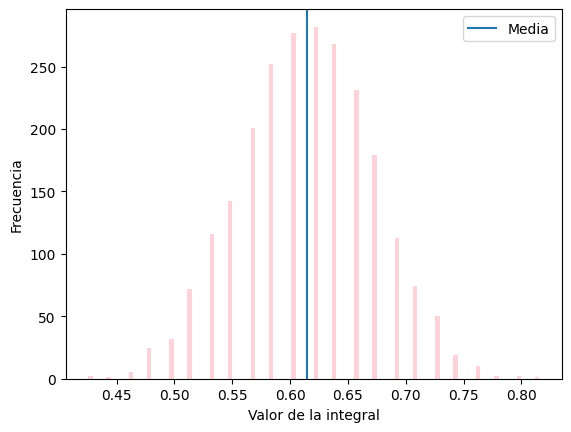

In [13]:
#Simulacion
#Parametros
m=2356                        #Número de iteraciones
n=50                            #Tamaño de la experimentos
a=0                             #Límite inferior de la integral
b=1                             #Límite superior de la integral
c=np.sqrt(np.arctan(1))         #Cota superior g(x)<c
aprox=[]
x_inside=[]
y_inside=[]
x_outside=[]
y_outside=[]
for i in range(m):             #Simulación de m experimentos
  [I,inside,outside,prob] = exp(n,a,b,c)
  aprox.append(I)
histograma(aprox)

In [14]:
end_time = time.time()
T2 = end_time - start_time
print(f"Tiempo de ejecución: {T2} segundos")

Tiempo de ejecución: 11.996362447738647 segundos


In [15]:
mu = np.mean(aprox)
print(mu)
sigma_ae = np.var(aprox)
print(sigma_ae)

0.6142350047157545
0.003307841350988846


# MUESTREO DE IMPORTANCIA

Dado que
$$
cos(\frac{\pi}{2}x) ≈ 1-x^2
$$
Podemos utilizar esta función para aplicar el método de muestreo de importancia. Para lo cual debemos primero definir si es una función de densidad.
Para demostrar que es una función de densidad se debe satisfacer que:


1.   $ g(x) \geq 0 $, se cumple que $1-x^2$ en el intervalo [0,1]
2.   $\int_{-∞}^{∞} g(x) dx = 1 → \int_{0}^{1} 1-x^2 dx = 2/3  $

Dado que no cumple la funcion, debemos multiplocar por 3/2
$$
g(x) = \frac{3}{2}(1-x^2)
$$
Ahora, utilizamos el método de aceptación y rechazo inversa para generar la muestra.

In [16]:
start_time = time.time()

In [17]:
def f(x):
  return (3/2)*(1-x**2)

In [18]:
def g(x):
    return 1  # Uniforme en [0, 1]

In [19]:
def aceptacion(n):
  x = 0
  C = (3/2)
  Lista = []
  for i in range(n):
    #Generamos una uniforme
    u = rnd.random() #Genera números aleatorios entre 0 y 1
    y = rnd.random() #Generar la variable y con la distribución de g.
    if (u <= f(y)/(C*g(y))):
      x = y
    Lista.append(x)#Agregamos los elementos a una lista
  return Lista

In [20]:
G = aceptacion(100000)

(array([747., 780., 770., 798., 840., 771., 712., 744., 746., 813., 688.,
        759., 674., 781., 764., 741., 765., 741., 760., 787., 801., 723.,
        744., 746., 745., 737., 701., 704., 756., 697., 667., 756., 733.,
        764., 696., 685., 729., 687., 717., 696., 740., 716., 714., 697.,
        702., 704., 659., 636., 709., 693., 672., 692., 733., 711., 692.,
        701., 700., 659., 698., 662., 682., 659., 640., 675., 711., 672.,
        637., 688., 739., 614., 670., 688., 674., 624., 652., 623., 694.,
        627., 686., 617., 669., 660., 584., 600., 638., 695., 639., 590.,
        558., 595., 582., 512., 599., 581., 583., 527., 580., 571., 561.,
        556., 581., 553., 511., 519., 493., 613., 593., 510., 536., 517.,
        467., 551., 573., 525., 453., 503., 511., 476., 448., 444., 580.,
        519., 491., 459., 405., 501., 428., 405., 431., 483., 480., 446.,
        442., 357., 462., 387., 404., 406., 360., 432., 392., 355., 394.,
        389., 368., 298., 393., 329., 

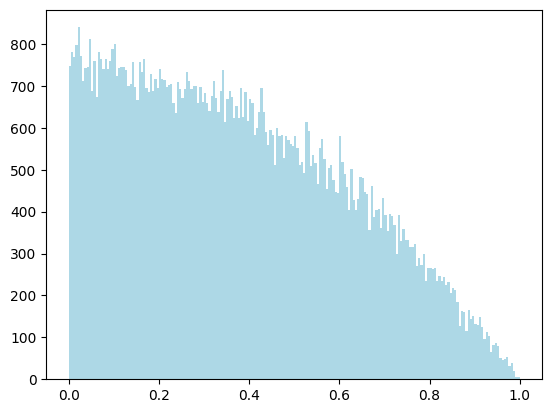

In [21]:
plt.hist(G,bins = 200, color = "lightblue")

In [22]:
def go(x):
  return np.cos((np.pi*x)/2)

In [23]:
def expm(n,a,b):
  I = 0
  G = aceptacion(n)
  for i in range(n):
     I +=  (1/n) * (go(G[i])/f(G[i]))
  return I

Estimación (Media):  0.6371247566599004


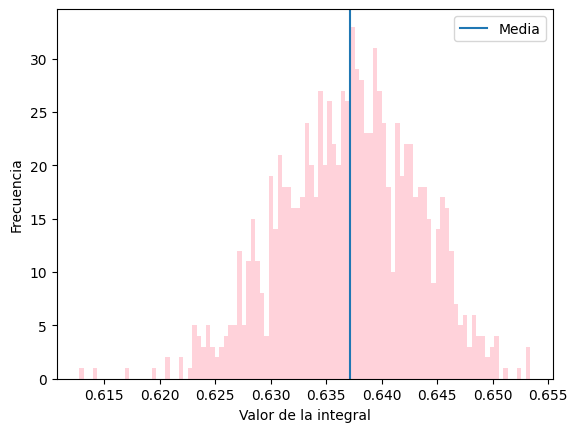

In [24]:
#Parametros
m=1000        #Número de iteraciones
n=50           #Tamaño de la experimentos
a=0             #Límite inferior de la integral
b=1             #Límite superior de la integral
aprox=[]
s = []
for i in range(m):
  I = expm(n,a,b)
  aprox.append(I)
histograma(aprox)

In [25]:
end_time = time.time()
T3 = end_time - start_time
print(f"Tiempo de ejecución: {T1} segundos")

Tiempo de ejecución: 15.407499313354492 segundos


In [26]:
mu = np.mean(aprox)
print(mu)
sigma_im = np.var(aprox)
print(sigma_im)

0.6371247566599004
3.742534215306458e-05


##EFICIENCIA

Suponga dos métodos MC para estimar $I = \int_{a}^{b} g(x) dx$ \\
Sean $Θ_1$ y $Θ_2$ las estimaciones producidas
$$E[Θ_1] = E[Θ_2] = I $$
Sean $t_1$ y $t_2$ los tiempos de computo requeridos para evaluar $Θ_1$ y $Θ_2$, respectivamente.
Diremos que el primer método es más eficiente que el segundo si:
$$
\epsilon = \frac{t_1var\theta_1}{t_2var\theta_2} < 1
$$

In [27]:
# Tabla de tiempos y varianzas de cada método

from tabulate import tabulate # Importamos libreria para nuestra tabla

resultados = [
    [ 'Media muestral', f'{T1:.4f}', f'{sigma_mean:.4f}'],
    [ 'Acierto y error', f'{T2:.4f}', f'{sigma_ae:.4f}'],
    [ 'Muestreo de importancia', f'{T3:.4f}', f'{sigma_im:.4f}']
]

# Encabezados
headers = ['Método', 'Tiempo', 'Varianza']

# Crear la tabla
tabla = tabulate(resultados, headers, tablefmt='grid')

# Mostrar la tabla
print(tabla)


+-------------------------+----------+------------+
| Método                  |   Tiempo |   Varianza |
+=========================+==========+============+
| Media muestral          |  15.4075 |     0.0019 |
+-------------------------+----------+------------+
| Acierto y error         |  11.9964 |     0.0033 |
+-------------------------+----------+------------+
| Muestreo de importancia |  19.283  |     0      |
+-------------------------+----------+------------+


In [31]:
epsilon1= (T1*sigma_mean)/(T2*sigma_ae) # Media muestral vs acierto y error
epsilon2= (T1*sigma_mean)/(T3*sigma_im) # Media muestral vs muestreo de importancia
epsilon3= (T2*sigma_ae)/(T1*sigma_mean) # Acierto y error vs media muestral
epsilon4= (T2*sigma_ae)/(T3*sigma_im) # Acierto y error vs muestreo de importancia
epsilon5= (T3*sigma_im)/(T1*sigma_mean) # Muestreo de importancia vs media muestral
epsilon6= (T3*sigma_im)/(T2*sigma_ae) # Muestreo de importancia vs acierto y error

# Crear lista de comparaciones
comparaciones = [
    ['Media muestral', ' - ', f'{epsilon1:.4f}', f'{epsilon2:.4f}'],
    ['Acierto y error', f'{epsilon3:.4f}', ' - ', f'{epsilon4:.4f}'],
    ['Muestreo de importancia', f'{epsilon5:.4f}', f'{epsilon6:.4f}', ' - ']
]

# Encabezados
headers = ['vs', 'Media muestral', 'Acierto y error', 'Muestreo de importancia']

# Crear la tabla
tabla1 = tabulate(comparaciones, headers, tablefmt='grid')

# Mostrar la tabla
print(tabla1)

+-------------------------+------------------+-------------------+---------------------------+
| vs                      | Media muestral   | Acierto y error   | Muestreo de importancia   |
+=========================+==================+===================+===========================+
| Media muestral          | -                | 0.7453            | 40.9820                   |
+-------------------------+------------------+-------------------+---------------------------+
| Acierto y error         | 1.3417           | -                 | 54.9863                   |
+-------------------------+------------------+-------------------+---------------------------+
| Muestreo de importancia | 0.0244           | 0.0182            | -                         |
+-------------------------+------------------+-------------------+---------------------------+


En la tabla anterior se muestra que el método de muestreo de importancia suele ser más eficiente que el de media muestral y acierto error, dado que al aplicar la formula anterior el resultado es menor que uno. \\
Mientras que el de acierto y error suele ser más eficiente que el de media muestral.